### 생선 분류
- 데이터 셋 : fish.csv
- 피쳐/특성 : Weight, Length
- 타겟/라벨 : Species
- 학습 방법 : 지도학습 => 분류
- 알고리즘  : 최근접 이웃 알고리즘

[1] 데이터 준비

In [387]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [388]:
Data_File = '../Data/fish.csv'

# 행 : Bream, Smelt, 컬럼 : Species, Weight, Length => 0, 1, 2
fish = pd.read_csv(Data_File, usecols=[0,1,2])
fish

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0
...,...,...,...
154,Smelt,12.2,12.2
155,Smelt,13.4,12.4
156,Smelt,12.2,13.0
157,Smelt,19.7,14.3


In [389]:
mask = (fish['Species'] == 'Bream') | (fish['Species'] == 'Smelt')
two_fish = fish[mask]
two_fish.reset_index(drop=True, inplace=True)
two_fish.head()

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0


In [390]:
# Species 컬럼을 수치화
name_dict = {name : idx + 1 for idx, name in enumerate(two_fish['Species'].unique())}
name_dict

{'Bream': 1, 'Smelt': 2}

In [391]:
two_fish

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0
5,Bream,450.0,29.7
6,Bream,500.0,29.7
7,Bream,390.0,30.0
8,Bream,450.0,30.0
9,Bream,500.0,30.7


In [392]:
two_fish = two_fish.copy() # 카피 안하면 워닝 뜸
two_fish['fish_code'] = two_fish['Species'].replace(name_dict).to_list()
two_fish

,Species,Weight,Length,fish_code
0,Bream,242.0,25.4,1
1,Bream,290.0,26.3,1
2,Bream,340.0,26.5,1
3,Bream,363.0,29.0,1
4,Bream,430.0,29.0,1
5,Bream,450.0,29.7,1
6,Bream,500.0,29.7,1
7,Bream,390.0,30.0,1
8,Bream,450.0,30.0,1
9,Bream,500.0,30.7,1


[3] 피쳐와 타겟 분리

In [393]:
features = two_fish[['Weight', 'Length']]
target = two_fish['fish_code']
print(f'feature => {features.shape}, {features.ndim}D')
print(f'target  => {target.shape}, {target.ndim}D')

feature => (49, 2), 2D
target  => (49,), 1D


[3] 데이터셋 준비 => 학습용, 테스트용

In [394]:
from sklearn.model_selection import train_test_split

In [395]:
# train : test = 80 : 20 ==> train_size = 0.8 또는 test_size = 0.2
# stratify 매개변수 : 분류일 경우 사용, 분류 타겟의 종류에 대한 비율을 고려
X_train, X_test, y_train, y_test = train_test_split(features, target, train_size=0.8,
                                                    stratify=target, random_state=42)

In [396]:
print(f'X_train : {X_train.shape}, {X_train.ndim}D')
print(f'y_train : {y_train.shape}, {y_train.ndim}D')

print(f'X_test : {X_test.shape}, {X_test.ndim}D')
print(f'y_test : {y_test.shape}, {y_test.ndim}D')

X_train : (39, 2), 2D
y_train : (39,), 1D
X_test : (10, 2), 2D
y_test : (10,), 1D


In [397]:
# target 0(Bream), 1(Smelt)의 비율
y_train.value_counts() / y_train.count()

fish_code
1    0.717949
2    0.282051
Name: count, dtype: float64

In [398]:
y_test.value_counts() / y_test.count()

fish_code
1    0.7
2    0.3
Name: count, dtype: float64

[4] 훈련/학습 진행
- 학습 알고리즘 인스턴스 생성
- 학습 진행 => fit()

In [399]:
from sklearn.neighbors import KNeighborsClassifier

In [400]:
model = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)

model.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=-1)

In [401]:
# 학습 후 모델 파라미터
model.classes_, model.feature_names_in_, model.n_samples_fit_

(array([1, 2]), array(['Weight', 'Length'], dtype=object), 39)

[5] 모델 성능평가 ==> score() 메서드 + 테스트 데이터셋

In [402]:
model.score(X_test, y_test)

1.0

[6] 예측하기 ==> 학습/훈련과 테스트에 사용되지 않은 데이터를 사용
- 주의 : 입력 데이터 ==> 2D

In [403]:
new_data = pd.DataFrame([[413, 27.8]], columns=model.feature_names_in_)
new_data

,Weight,Length
0,413,27.8


In [404]:
model.predict(new_data)

array([1])

In [405]:
distance, indexes = model.kneighbors(new_data)

In [406]:
distance

array([[17.04230031, 37.04875167, 37.0653477 , 50.01439793, 62.08252572]])

In [407]:
indexes

array([[36, 22, 35, 18, 34]])

In [408]:
neighbors = indexes.reshape(-1).tolist()
neighbors

[36, 22, 35, 18, 34]

In [409]:
neighbors_df = two_fish.iloc[neighbors, :]
neighbors_df

,Species,Weight,Length,fish_code
36,Smelt,7.5,10.5,2
22,Bream,620.0,34.5,1
35,Smelt,6.7,9.8,2
18,Bream,610.0,33.5,1
34,Bream,950.0,41.0,1


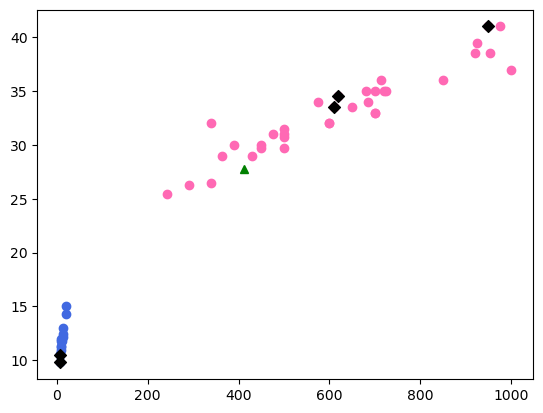

In [410]:
# 도미(Bream), 빙어(Smelt)에 대한 시각화 ==> 2개 피쳐 Weight, Length로 Bream, Smelt 분류 가능함
plt.scatter(two_fish[two_fish['Species'] == 'Bream']['Weight'],
            two_fish[two_fish['Species'] == 'Bream']['Length'], color = 'hotpink')
plt.scatter(two_fish[two_fish['Species'] == 'Smelt']['Weight'],
            two_fish[two_fish['Species'] == 'Smelt']['Length'], color = 'royalblue')

plt.plot(new_data['Weight'], new_data['Length'], color = 'g', marker = '^')

plt.scatter(neighbors_df['Weight'], neighbors_df['Length'], color = 'black', marker = 'D')

plt.show()